# Iris Flowers Classification ML Project

# Agenda

# Title: Iris Flowers Classification ML Project

The goal is predict the measurement of the new IRIS species. 
We are here to create a ML model that can learn from the measurements of the IRIS flower whose species are already known.

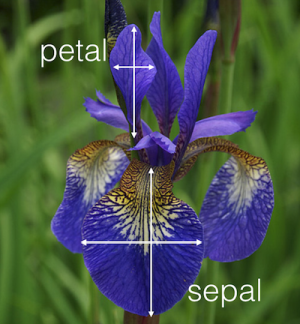

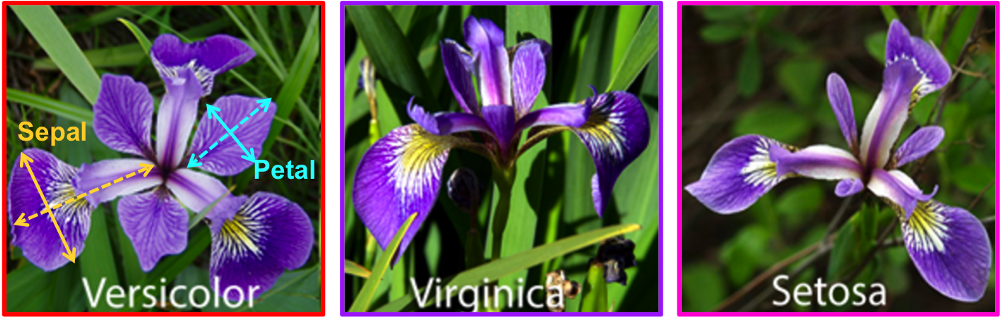

In [4]:
from PIL import Image
img= Image.open("01_iris.png")
img

# Importing Libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

#!pip install scikit-plot
import scikitplot as skplt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Importing Dataset

In [8]:
iris_data= pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
iris_data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
iris_data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [10]:
iris_data.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [11]:
iris_data.tail() #print last 5 values

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [42]:
columns = ['sepal_lenght', 'sepal_width', 'petal_lenght', 'petal_width', 'Species']

In [43]:
iris_data.columns = columns
iris_data.head()

,sepal_lenght,sepal_width,petal_lenght,petal_width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [44]:
iris_data.max() 

sepal_lenght               7.9
sepal_width                4.4
petal_lenght               6.9
petal_width                2.5
Species         Iris-virginica
dtype: object

In [45]:
iris_data.min()

sepal_lenght            4.3
sepal_width             2.0
petal_lenght            1.0
petal_width             0.1
Species         Iris-setosa
dtype: object

In [46]:
iris_data.isnull() # returns a DataFrame object where all the values are replaced with a Boolean,True for NULL values,otherwise False.

,sepal_lenght,sepal_width,petal_lenght,petal_width,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
144,False,False,False,False,False
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False


# Data Exploration

In [47]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_lenght  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_lenght  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   Species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [48]:
r,c = iris_data.shape
print("Number of rows = ",r)
print("Number of columns = ",c)

Number of rows =  149
Number of columns =  5


In [49]:
iris_data.describe()

,sepal_lenght,sepal_width,petal_lenght,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [50]:
iris_data.columns

Index(['sepal_lenght', 'sepal_width', 'petal_lenght', 'petal_width',
       'Species'],
      dtype='object')

In [51]:
iris_data.nunique() # return number of unique elements in the object

sepal_lenght    35
sepal_width     23
petal_lenght    43
petal_width     22
Species          3
dtype: int64

In [53]:
iris_data.Species.nunique()

3

In [54]:
iris_data.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Species, dtype: int64

# Missing Value's Imputation

In [22]:
iris_data.isnull().sum()

sepal_lenght    0
sepal_width     0
petal_lenght    0
petal_width     0
class           0
dtype: int64

This shows how many null values each column in the data frame has, we can see that there are no null values in any columns of the data frame.

# Data Visualization

Box Plot

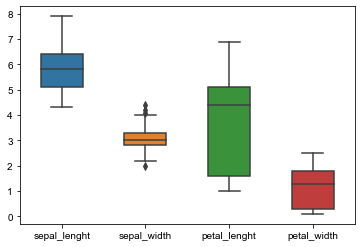

In [26]:
sns.boxplot(data = iris_data, width= 0.5, fliersize = 5)
sns.set(rc = {"figure.figsize" :(6,6)})

<AxesSubplot:xlabel='Species', ylabel='sepal_width'>

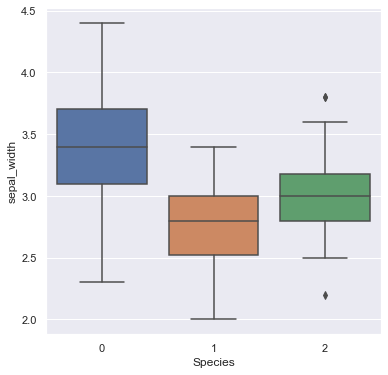

In [73]:
sns.boxplot(x = "Species", y = "sepal_width", data = iris_data)

<AxesSubplot:xlabel='Species', ylabel='sepal_lenght'>

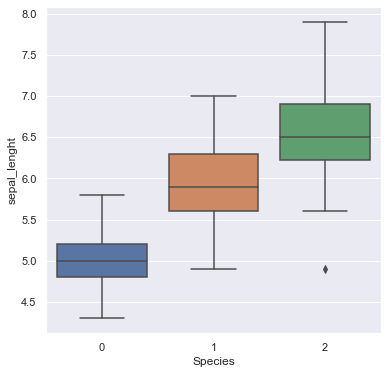

In [75]:
sns.boxplot(x = "Species", y = "sepal_lenght", data = iris_data)

<AxesSubplot:xlabel='Species', ylabel='petal_width'>

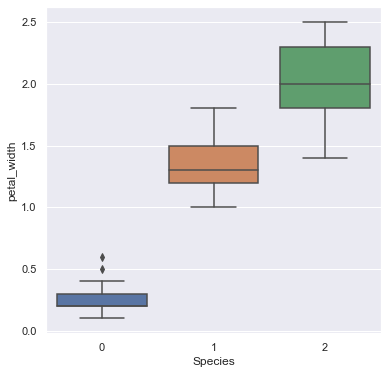

In [76]:
sns.boxplot(x = "Species", y = "petal_width", data = iris_data)

<AxesSubplot:xlabel='Species', ylabel='petal_lenght'>

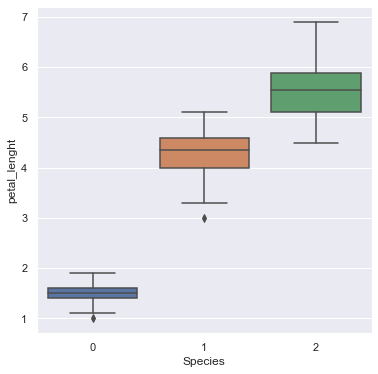

In [77]:
sns.boxplot(x = "Species", y = "petal_lenght", data = iris_data)

# Heatmap

Index(['sepal_lenght', 'sepal_width', 'petal_lenght', 'petal_width',
       'Species'],
      dtype='object')

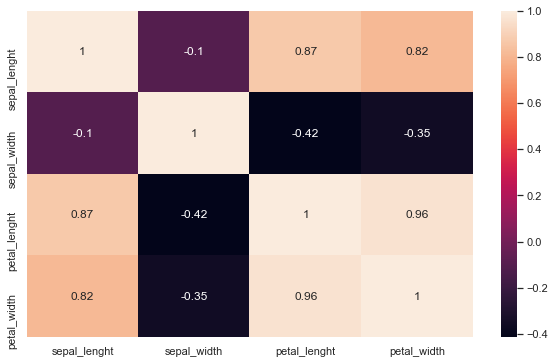

In [60]:
#Plot a heatmap to find the correlation between column quantities
# heatmap uses to show 2D data in graphical format.Each data value represents in a matrix and it has a special color. 
#‘True‘ value to annot then the value will show on each cell of the heatmap
# we change the color of seaborn heatmap but center parameter will change cmap according to a given value by the creator.
corr = iris_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot = True)
iris_data.columns

From the abpve heatmap, the correlation between different features is visible using the iris data set. There's correlation among sepal_length to reveiws to petal_width. petal_length and petal_width gives almost the same information.

# Violin Plot

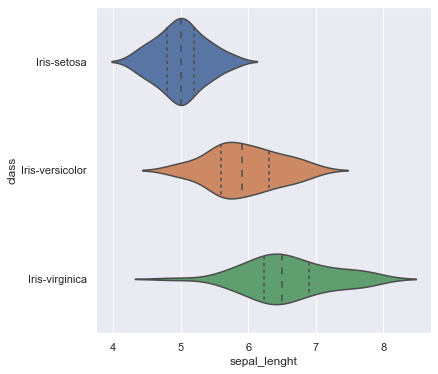

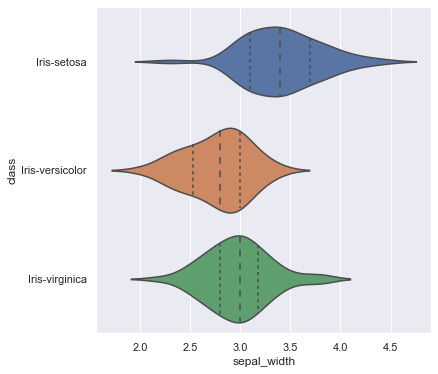

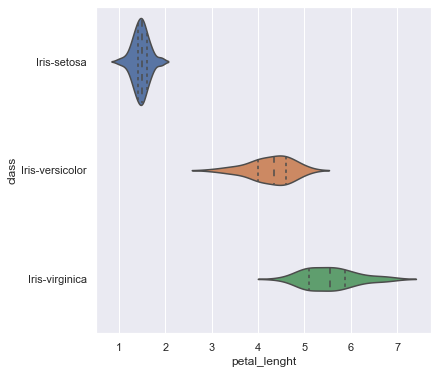

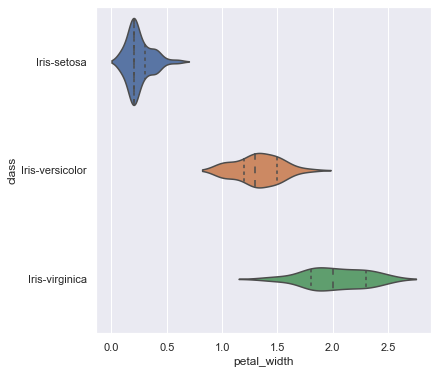

In [29]:
sns.violinplot(y='class', x='sepal_lenght', data=iris_data, inner='quartile')
plt.show()
sns.violinplot(y='class', x='sepal_width', data=iris_data, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal_lenght', data=iris_data, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal_width', data=iris_data, inner='quartile')
plt.show()

The above-plotted violin plot says that Iris-Setosa class is having a smaller petal length and petal width compared to other class.

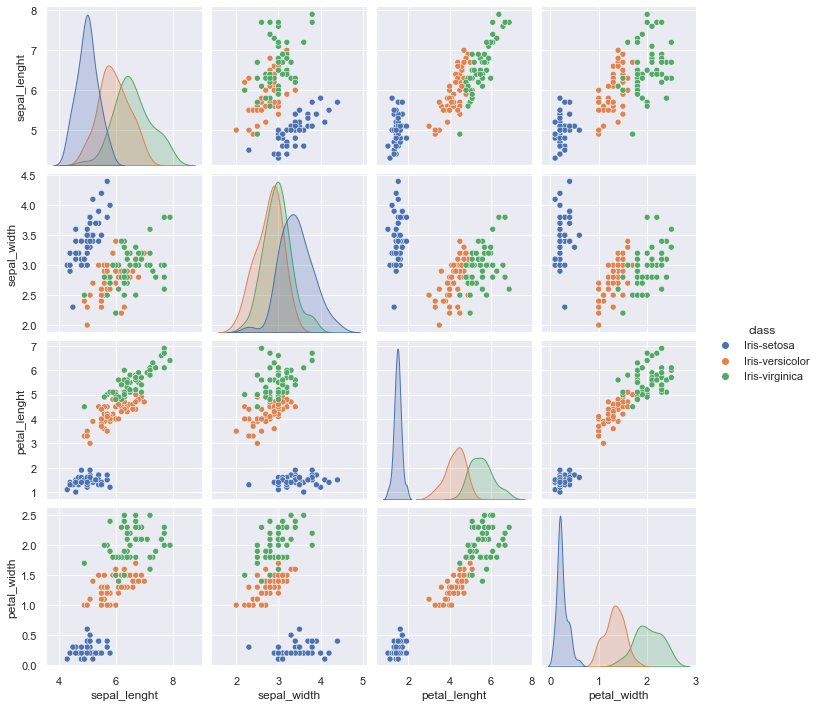

In [35]:
sns.pairplot(iris_data, hue = 'class') # A pairplot plot a pairwise relationships in a dataset.

In [32]:
iris_data

,sepal_lenght,sepal_width,petal_lenght,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


# Model Creation


As we have measurements for which we know the correct species of iris, this is a supervised learning problem. We want to predict one of several options (the species of iris), making it an example of a classification problem.

To test the model’s performance, we show it new data for which we have labels This is usually done by splitting the labelled data we have collected into two parts. One part of the data is used to build the machine learning model, and is called the training data or training set (which we will call x_train and y_train). The rest of the data will be used to test how well the model works; this is called the test set, test data, or hold-out set (which we will call X_test, y_test).

5.1.X is having all the dependent variables.

Y is having an independent variable (here in this case ‘class’ is an independent variable).

In [36]:
X = iris_data.drop(['class'], axis=1)
y = iris_data['class']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (149, 4) | y shape: (149,) 


In [79]:
#Train Test split
#Splitting our dataset into train and test using train_test_split(), 
#what we are doing here is taking 80% of data to train our model, and 20% that we will hold back as a validation dataset:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

In [80]:
#Model Creation

#Support Vector Machines (SVM) Support Vector Classifier (SVC) is performing better than other algorithms. 
#Let’s train SVC model on our training set and predict on test set in the next step.


model = []
model.append(('SVC', SVC(gamma='auto')))

# Model Building 
# We are defining our SVC model and passing gamma as auto

#After that fitting/training the model on X_train and Y_train using .fit() method.
# Then we are predicting on X_test using .predict() method. model = SVC(gamma='auto')

In [85]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [86]:
print(f'Test Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 0.9333333333333333
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.90      1.00      0.95         9
           2       1.00      0.50      0.67         2

    accuracy                           0.93        15
   macro avg       0.97      0.83      0.87        15
weighted avg       0.94      0.93      0.92        15



# Label Encoder

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # LabelEncoder can be used to normalize labels.

In [68]:

iris_data['Species'] = le.fit_transform(iris_data['Species'])  # fit_transform: Fit label encoder and return encoded labels.
iris_data.head()

,sepal_lenght,sepal_width,petal_lenght,petal_width,Species
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [69]:
X = iris_data.drop(columns=['Species']) # Drop column
y = iris_data['Species'] 
X[:5] # # Return list from beginning until index 5

,sepal_lenght,sepal_width,petal_lenght,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [70]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

# Splitting the Dataset into the Training set and Test set
Trying another way

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

# Selecting the Models and Metrics(Supervised Machine Learning Models)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [63]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Training and Evaluating the Models

In [64]:
models = [lr, knn, svm, nb, dt, rf]
scores = []

for model in models:
  model.fit(X_train, y_train) # LogisticRegression.fit(X_train, y_train) # Fitting Support Vector Classifer to the Training set
  y_pred = model.predict(X_test) #LogisticRegression.predict(X_test) # Predicting the Test set results
  scores.append(accuracy_score(y_test, y_pred)) # Accuracy on the Test set results  
  print("Accuracy of " + type(model).__name__ + " is", accuracy_score(y_test, y_pred))

C:\Users\chitranshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of LogisticRegression is 0.9555555555555556
Accuracy of KNeighborsClassifier is 0.9555555555555556
Accuracy of SVC is 0.9555555555555556
Accuracy of GaussianNB is 0.9333333333333333
Accuracy of DecisionTreeClassifier is 0.9555555555555556
Accuracy of RandomForestClassifier is 0.9555555555555556


In [65]:
results = pd.DataFrame({
    'Models': ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 'Naive Bayes', 'Decision Tree', 
               'Random Forest'],'Accuracy': scores})

results = results.sort_values(by='Accuracy', ascending=False)
print(results)

                   Models  Accuracy
0     Logistic Regression  0.955556
1     K-Nearest Neighbors  0.955556
2  Support Vector Machine  0.955556
4           Decision Tree  0.955556
5           Random Forest  0.955556
3             Naive Bayes  0.933333
